In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "3"

from matplotlib import pyplot as plt
import numpy as np

import copy

In [2]:
from os import listdir
import re
BASE_DIR = "../../CleanedModels/models/ModelsTesting/"
testing_data = []
testing_results = {}
for DIR in listdir(BASE_DIR):
    FULL_DIR = BASE_DIR + DIR
    space_size = int(re.findall(r"_0?([0-9]*)_", DIR)[-1])
    try:
        data = np.loadtxt(FULL_DIR + "/epoch_data.csv", delimiter=',')
    except:
        continue
    data = data[-1,:]
    testing_data.append((space_size, data[1], data[2], data[3], data[4], data[5], data[6]))
    if space_size in testing_results.keys():
        testing_results[space_size]["t_mse"].append(data[1])
        testing_results[space_size]["v_mse"].append(data[2])
        testing_results[space_size]["t_dl"].append(data[3])
        testing_results[space_size]["v_dl"].append(data[4])
        testing_results[space_size]["t_gl"].append(data[5])
        testing_results[space_size]["v_gl"].append(data[6])
        testing_results[space_size]["t_diff"].append(data[3] - data[5])
        testing_results[space_size]["v_diff"].append(data[4] - data[6])
    else:
        testing_results[space_size] = {
            "t_mse": [data[1]],
            "v_mse": [data[2]],
            "t_dl":  [data[3]],
            "v_dl":  [data[4]],
            "t_gl":  [data[5]],
            "v_gl":  [data[6]],
            "t_diff": [data[3] - data[5]],
            "v_diff": [data[4] - data[6]],
        }
testing_data = np.array(testing_data)
testing_results[1]['t_mse']

[0.03831879422068596,
 0.1187107115983963,
 0.16365589201450348,
 0.039159368723630905,
 0.18282656371593475,
 0.09447649866342545,
 0.16753192245960236,
 0.040330443531274796,
 0.11326785385608673,
 0.03986871987581253]

''

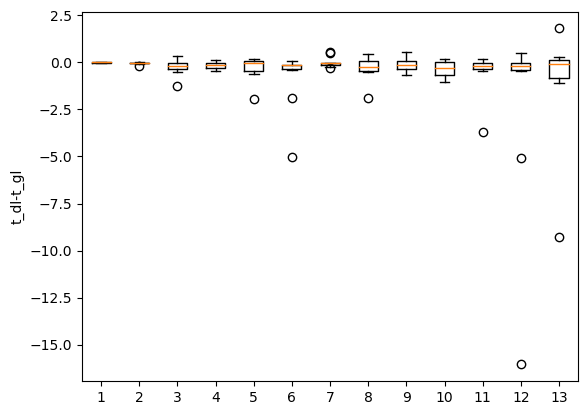

In [6]:
metric = {}
metrics = ['t_mse', 't_dl', 't_gl', 'v_mse', 'v_dl', 'v_gl']
l = 't'
# plt.figure(figsize=(10,6))
results = copy.deepcopy(testing_results)
testing_results = copy.deepcopy(results)
metric = {}
for index in testing_results.keys():
    res1 = testing_results[index][f'{l}_dl']
    res2 = testing_results[index][f'{l}_gl']
    res = np.array(res1) - np.array(res2)
    if index in metric.keys():
        metric[index].append(res)
    else:
        metric[index] = res
metric = dict(sorted(metric.items()))
plt.boxplot(metric.values(), labels=metric.keys())
# plt.yscale('log')
plt.ylabel(f'{l}_dl-{l}_gl')
# plt.tight_layout()
# plt.savefig(f"./figures/model_{l}diff.jpg")
# plt.blank()
# plt.savefig(f"./figures/model_{l}diff.svg")
# _plt = blank_plot(plt)
# _plt.savefig(f"./figures/model_{metric_name}.eps")
""

In [11]:
from sunlab.common.plotting import blank_plot
from sunlab.globals import DIR_ROOT

In [15]:
SAVE_FIGURES=False

''

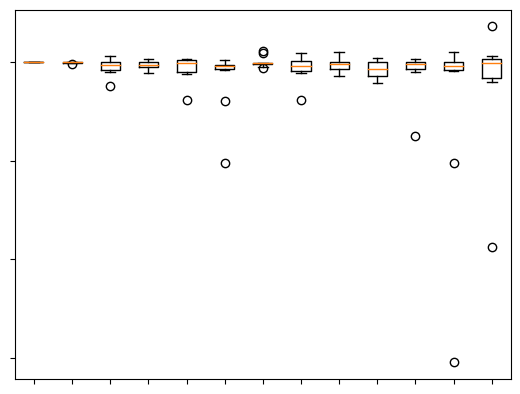

In [14]:
for idx in range(len(metrics)):
    plt.clf()
    metric = {}
    metrics = ['t_mse', 'v_mse', 't_dl', 'v_dl', 't_gl', 'v_gl', 't_diff', 'v_diff']
    metric_name = metrics[idx]
    for index in testing_results.keys():
        if index in metric.keys():
            metric[index].append(testing_results[index][metric_name])
        else:
            metric[index] = testing_results[index][metric_name]
    metric = dict(sorted(metric.items()))
    plt.boxplot(metric.values(), labels=metric.keys())
    if not (metric_name in ['t_diff','v_diff']):
        plt.yscale('log')
    blank_plot(_xticks=True, _yticks=True)
    if SAVE_FIGURES:
        plt.save(DIR_ROOT + f"Figures/EX/model_{metric_name}", _xticks=True, _yticks=True)
# plt.savefig(f"./figures/model_{metric_name}.jpg")
# # _plt = blank_plot(plt)
# plt.blank()
# plt.savefig(f"./figures/model_{metric_name}.svg")
""